In [1]:
# https://www.youtube.com/playlist?list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ

In [2]:
!wget https://raw.githubusercontent.com/karpathy/makemore/refs/heads/master/names.txt

--2025-01-01 09:45:43--  https://raw.githubusercontent.com/karpathy/makemore/refs/heads/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>] 222.80K  --.-KB/s    in 0.02s   

2025-01-01 09:45:43 (11.8 MB/s) - ‘names.txt’ saved [228145/228145]



In [3]:
# NeuralNet
# recieve single char as input and return prob distrubition for next char

In [4]:
words = open("names.txt", "r").read().splitlines()

In [5]:
chars = sorted(list(set(''.join(words))))

In [6]:
stoi = {s:(i+1) for i,s in enumerate(chars)}
# use "." as special char instead of <S> or <E>
stoi['.'] = 0

In [7]:
import torch

In [8]:
# create training set
xs, ys = [], []

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [9]:
xs

tensor([ 0,  5, 13,  ..., 25, 26, 24])

In [10]:
ys

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [11]:
# one hot encode chars

In [12]:
import torch.nn.functional as F
# we converted one hot to float casue we want to always feed float to neural net not ints
# one_hot always gives 
xenc = F.one_hot(xs, num_classes=27).float()

In [13]:
xenc

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 1., 0., 0.]])

In [14]:
# weights of neuron
W = torch.randn((27,1))
W

tensor([[ 1.5096],
        [-0.6377],
        [-0.3577],
        [ 1.3929],
        [ 0.0620],
        [ 1.4093],
        [-0.6595],
        [-0.4619],
        [-1.0796],
        [ 1.4828],
        [-1.6891],
        [-0.6066],
        [-0.1661],
        [ 0.7633],
        [ 1.1227],
        [-0.5183],
        [-0.4929],
        [-1.2660],
        [ 0.5398],
        [ 1.1484],
        [ 1.4428],
        [-0.5832],
        [-0.7926],
        [-0.6848],
        [ 0.2762],
        [ 0.4321],
        [-0.3783]])

In [15]:
# @ means matrix multiplication
xenc @ W

tensor([[ 1.5096],
        [ 1.4093],
        [ 0.7633],
        ...,
        [ 0.4321],
        [-0.3783],
        [ 0.2762]])

In [16]:
# weights of 27 neuron
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), requires_grad=True, generator=g)
W

tensor([[ 1.5674e+00, -2.3729e-01, -2.7385e-02, -1.1008e+00,  2.8588e-01,
         -2.9643e-02, -1.5471e+00,  6.0489e-01,  7.9136e-02,  9.0462e-01,
         -4.7125e-01,  7.8682e-01, -3.2843e-01, -4.3297e-01,  1.3729e+00,
          2.9334e+00,  1.5618e+00, -1.6261e+00,  6.7716e-01, -8.4039e-01,
          9.8488e-01, -1.4837e-01, -1.4795e+00,  4.4830e-01, -7.0730e-02,
          2.4968e+00,  2.4448e+00],
        [-6.7006e-01, -1.2199e+00,  3.0314e-01, -1.0725e+00,  7.2762e-01,
          5.1114e-02,  1.3095e+00, -8.0220e-01, -8.5042e-01, -1.8068e+00,
          1.2523e+00, -1.2256e+00,  1.2165e+00, -9.6478e-01, -2.3211e-01,
         -3.4762e-01,  3.3244e-01, -1.3263e+00,  1.1224e+00,  5.9641e-01,
          4.5846e-01,  5.4011e-02, -1.7400e+00,  1.1560e-01,  8.0319e-01,
          5.4108e-01, -1.1646e+00],
        [ 1.4756e-01, -1.0006e+00,  3.8012e-01,  4.7328e-01, -9.1027e-01,
         -7.8305e-01,  1.3506e-01, -2.1161e-01, -1.0406e+00, -1.5367e+00,
          9.3743e-01, -8.8303e-01,  1.74

In [17]:
xenc @ W

tensor([[ 1.5674, -0.2373, -0.0274,  ..., -0.0707,  2.4968,  2.4448],
        [ 0.4724,  1.4830,  0.3175,  ..., -0.4275, -2.1259,  0.9604],
        [ 0.1936,  1.0532,  0.6339,  ...,  1.5447,  0.6006, -0.7091],
        ...,
        [ 0.7414, -0.5879, -0.4651,  ..., -0.1388,  1.3096, -0.2580],
        [ 1.0669,  0.2136, -0.7660,  ...,  1.3405, -0.2175,  0.8627],
        [ 0.2163, -0.7873, -0.3301,  ..., -0.2630, -0.7552,  0.8191]],
       grad_fn=<MmBackward0>)

In [18]:
# assume neural network gives log counts, we exponentiate them to get actual count
logits = (xenc @ W) # log counts
counts = logits.exp()
counts

tensor([[ 4.7940,  0.7888,  0.9730,  ...,  0.9317, 12.1434, 11.5281],
        [ 1.6038,  4.4060,  1.3737,  ...,  0.6521,  0.1193,  2.6128],
        [ 1.2136,  2.8669,  1.8850,  ...,  4.6866,  1.8232,  0.4921],
        ...,
        [ 2.0989,  0.5555,  0.6281,  ...,  0.8704,  3.7049,  0.7726],
        [ 2.9062,  1.2382,  0.4649,  ...,  3.8208,  0.8046,  2.3696],
        [ 1.2415,  0.4551,  0.7189,  ...,  0.7687,  0.4699,  2.2685]],
       grad_fn=<ExpBackward0>)

In [19]:
# prob is count normalized
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0607, 0.0100, 0.0123,  ..., 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248,  ..., 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484,  ..., 0.1204, 0.0469, 0.0126],
        ...,
        [0.0301, 0.0080, 0.0090,  ..., 0.0125, 0.0531, 0.0111],
        [0.0634, 0.0270, 0.0101,  ..., 0.0833, 0.0175, 0.0517],
        [0.0308, 0.0113, 0.0178,  ..., 0.0190, 0.0116, 0.0562]],
       grad_fn=<DivBackward0>)

In [20]:
# we can get prob directly from logits using softmax func
# then no need of doing exp and normalization urself

In [21]:
# gradient descent

In [22]:
torch.arange(len(xs))

tensor([     0,      1,      2,  ..., 228143, 228144, 228145])

In [23]:
# loss function
# negative log likelihood
loss = -probs[torch.arange(len(xs)), ys].log().mean()

In [24]:
loss

tensor(3.7590, grad_fn=<NegBackward0>)

In [25]:
# backward pass
# set grad to zero/none
W.grad = None

loss.backward()

In [26]:
W.grad

tensor([[ 8.5187e-03, -1.7928e-02, -3.9954e-03, -6.1678e-03, -5.0425e-03,
         -4.9855e-03, -1.4495e-03,  3.2138e-04, -1.9076e-03,  1.8004e-03,
         -9.5068e-03, -9.0844e-03, -5.6108e-03, -9.9719e-03,  1.9904e-03,
          3.1664e-02,  6.2140e-03, -5.3713e-05, -3.6864e-03, -8.2406e-03,
         -9.7537e-04,  1.1901e-03, -1.2434e-03,  1.4365e-03,  1.0683e-03,
          1.9233e-02,  1.6413e-02],
        [-2.6880e-02, -1.1534e-03,  3.5157e-03, -5.7258e-04,  4.4327e-03,
          1.5423e-03,  1.5517e-02,  1.2128e-03, -8.3641e-03, -6.5184e-03,
          1.4442e-02, -1.2133e-03,  3.5937e-03, -5.5054e-03, -2.0389e-02,
          2.7948e-03,  5.7026e-03,  8.9113e-04, -9.4968e-04,  2.9929e-03,
          3.8649e-03,  2.9188e-03, -2.8925e-03,  4.1746e-03,  8.9087e-03,
         -1.5171e-03, -5.5008e-04],
        [-2.1135e-04, -1.3155e-03,  1.9726e-04,  3.9496e-04, -1.8479e-04,
         -2.7573e-03,  2.8475e-04,  2.0133e-04, -9.1831e-05, -8.9764e-04,
          6.3084e-04,  1.0287e-04,  9.73

In [27]:
# update weights
W.data += -0.1 * W.grad

In [28]:
# now do it in loop
for k in range(100):
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float()
    # cause xenc is one hot encoded
    # logits will just select that row of W
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(len(xenc)), ys].log().mean()
    print(loss.item())

    # backward pass
    W.grad = None
    loss.backward()

    # update
    W.data += -50 * W.grad

3.758039712905884
3.370584011077881
3.1537325382232666
3.02016544342041
2.9275617599487305
2.8602912425994873
2.809643268585205
2.770033836364746
2.7380166053771973
2.711449146270752
2.688962697982788
2.6696534156799316
2.652899742126465
2.6382505893707275
2.625364303588867
2.6139698028564453
2.60384464263916
2.5948050022125244
2.5866966247558594
2.579390048980713
2.5727767944335938
2.566765069961548
2.5612776279449463
2.5562491416931152
2.5516247749328613
2.5473577976226807
2.543407678604126
2.5397415161132812
2.536329746246338
2.5331482887268066
2.530174970626831
2.5273914337158203
2.5247812271118164
2.5223300457000732
2.520024538040161
2.5178537368774414
2.5158066749572754
2.5138742923736572
2.5120487213134766
2.5103206634521484
2.508683919906616
2.507131576538086
2.5056586265563965
2.504258394241333
2.502926826477051
2.5016584396362305
2.5004498958587646
2.4992966651916504
2.4981954097747803
2.497142791748047
2.496135950088501
2.4951717853546143
2.4942476749420166
2.493361711502075

In [29]:
# we can have model smoothing in Neural net also
# if we force our weights to be near 0 or same to each other
# then our probibility will be more uniform
# and this is called normalization

In [30]:
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [31]:
# generate names
g = torch.Generator().manual_seed(2147483647)

# generate 5 names
for i in range(5):
    out = []
    # start with start char
    ix = 0
    while True:
        # run neural net on each char
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdims=True)

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

junide.
janasah.
p.
cfay.
a.


In [32]:
# Neural Net advanced

In [33]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [34]:
%matplotlib inline

In [35]:
# reald all the words
words = open("names.txt", "r").read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [36]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
vocab_size = len(itos)
print(itos)
print(vocab_size)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}
27


In [37]:
# build the dataset
block_size = 3 # context length: how many chars do we take input to predict next one

def build_dataset(words):
    X, Y = [], []

    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix] # crop and append

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y
            

In [38]:
import random
random.seed(42)
# shuffle word
random.shuffle(words)

n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1]) # 80%
Xdev, Ydev = build_dataset(words[n1:n2]) # 10%
Xte, Yte = build_dataset(words[n2:]) # 10%

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [39]:
# embeds each char to 10 float values
n_embed = 10 # dimension of the char embedding vector
n_hidden = 200 # neuron in hidden layer 

g = torch.Generator().manual_seed(2147483647)
# converts each letter to embedding 
C = torch.randn((vocab_size, n_embed), generator=g)
# first layer
W1 = torch.randn((n_embed * block_size, n_hidden), generator=g)
b1 = torch.randn(n_hidden, generator=g)
# second layer
W2 = torch.randn((n_hidden, vocab_size), generator=g)
b2 = torch.randn(vocab_size, generator=g)

parameters = [C, W1, b1, W2, b2]
print(sum(p.nelement() for p in parameters))
for p in parameters:
    p.requires_grad = True

11897


In [40]:
max_steps = 200000 # epochs
batch_size = 32
lossi = []

for i in range(max_steps):
    # minibatch consturct
    # randonly sample some from training of given size
    ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
    Xb, Yb = Xtr[ix], Ytr[ix] # batch X, Y

    # forward pass
    emb = C[Xb] # embed char to vectors
    embcat = emb.view(emb.shape[0], -1) # concatenate 3 different vectors
    hpreact = embcat @ W1 + b1 # hidden layer
    h = torch.tanh(hpreact)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Yb)

    # backward pass
    # set grad to zero
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = 0.1 if i < 100000 else 0.01 # step learning rate decay
    for p in parameters:
        p.data += -lr * p.grad

    # torch stats
    if i % 10000 == 0:
        print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
    lossi.append(loss.log10().item())

      0/ 200000: 27.8817
  10000/ 200000: 2.9571
  20000/ 200000: 2.5722
  30000/ 200000: 2.7646
  40000/ 200000: 2.0305
  50000/ 200000: 2.5794
  60000/ 200000: 2.3242
  70000/ 200000: 2.1174
  80000/ 200000: 2.2993
  90000/ 200000: 2.2481
 100000/ 200000: 2.0146
 110000/ 200000: 2.4534
 120000/ 200000: 1.9164
 130000/ 200000: 2.3719
 140000/ 200000: 2.2377
 150000/ 200000: 2.1441
 160000/ 200000: 2.2661
 170000/ 200000: 1.7855
 180000/ 200000: 2.1126
 190000/ 200000: 1.8004


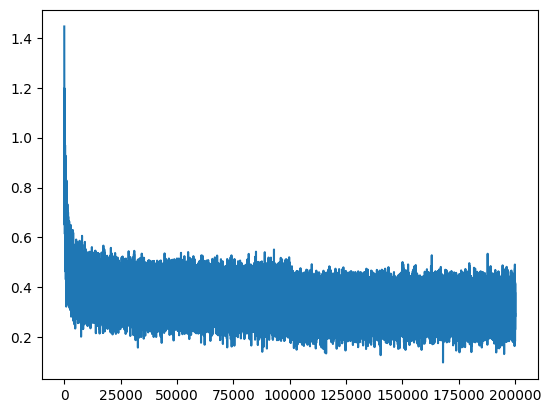

In [41]:
plt.plot(lossi)

In [42]:
@torch.no_grad()
def split_loss(split):
    x,y = {
        "train": (Xtr, Ytr),
        "val": (Xdev, Ydev),
        "test": (Xte, Yte),
    }[split]
    emb = C[x]
    embcat = emb.view(emb.shape[0], -1)
    h = torch.tanh(embcat @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, y)
    print(split, loss.item())

split_loss("train")
split_loss("val")

train 2.1270017623901367
val 2.169905662536621


In [43]:
# embeds each char to 10 float values
n_embed = 10 # dimension of the char embedding vector
n_hidden = 200 # neuron in hidden layer 

g = torch.Generator().manual_seed(2147483647)
# converts each letter to embedding 
C = torch.randn((vocab_size, n_embed), generator=g)
# first layer
W1 = torch.randn((n_embed * block_size, n_hidden), generator=g)
b1 = torch.randn(n_hidden, generator=g)
# second layer
W2 = torch.randn((n_hidden, vocab_size), generator=g)
b2 = torch.randn(vocab_size, generator=g)

parameters = [C, W1, b1, W2, b2]
print(sum(p.nelement() for p in parameters))
for p in parameters:
    p.requires_grad = True

11897


In [44]:
max_steps = 200000 # epochs
batch_size = 32
lossi = []

for i in range(max_steps):
    # minibatch consturct
    # randonly sample some from training of given size
    ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
    Xb, Yb = Xtr[ix], Ytr[ix] # batch X, Y

    # forward pass
    emb = C[Xb] # embed char to vectors
    embcat = emb.view(emb.shape[0], -1) # concatenate 3 different vectors
    hpreact = embcat @ W1 + b1 # hidden layer
    h = torch.tanh(hpreact)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Yb)

    # backward pass
    # set grad to zero
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = 0.1 if i < 100000 else 0.01 # step learning rate decay
    for p in parameters:
        p.data += -lr * p.grad

    # torch stats
    if i % 10000 == 0:
        print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
    lossi.append(loss.log10().item())

    break

      0/ 200000: 27.8817


In [45]:
logits[0]

tensor([ -2.3527,  36.4366, -10.7306,   5.7165,  18.6409, -11.6998,  -2.1991,
          1.8535,  10.9996,  10.6730,  12.3507, -10.3809,   4.7243, -24.4257,
         -8.5909,   1.9024, -12.2744, -12.4751, -23.2778,  -2.0163,  25.8767,
         14.2108,  17.7691, -10.9204, -20.7335,   6.4560,  11.1615],
       grad_fn=<SelectBackward0>)

In [46]:
# logits are taking extreme value, initally we want it to be uniform so should be 1/27

In [47]:
# now logits is calulated by adding bias at end, since we want initally logits to be 1/27, we can remove bias
# we also want weights to be less so multiply bu 0.1
# embeds each char to 10 float values
# we dont want to set weights to 0 directly cause we want to give some control to learning also we want them to be close to zero but not zero
n_embed = 10 # dimension of the char embedding vector
n_hidden = 200 # neuron in hidden layer 

g = torch.Generator().manual_seed(2147483647)
# converts each letter to embedding 
C = torch.randn((vocab_size, n_embed), generator=g)
# first layer
W1 = torch.randn((n_embed * block_size, n_hidden), generator=g)
b1 = torch.randn(n_hidden, generator=g)
# second layer
W2 = torch.randn((n_hidden, vocab_size), generator=g) * 0.01 # scale down
b2 = torch.randn(vocab_size, generator=g) * 0 # removed bias

parameters = [C, W1, b1, W2, b2]
print(sum(p.nelement() for p in parameters))
for p in parameters:
    p.requires_grad = True

11897


In [48]:
max_steps = 200000 # epochs
batch_size = 32
lossi = []

for i in range(max_steps):
    # minibatch consturct
    # randonly sample some from training of given size
    ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
    Xb, Yb = Xtr[ix], Ytr[ix] # batch X, Y

    # forward pass
    emb = C[Xb] # embed char to vectors
    embcat = emb.view(emb.shape[0], -1) # concatenate 3 different vectors
    hpreact = embcat @ W1 + b1 # hidden layer
    h = torch.tanh(hpreact)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Yb)

    # backward pass
    # set grad to zero
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = 0.1 if i < 100000 else 0.01 # step learning rate decay
    for p in parameters:
        p.data += -lr * p.grad

    # torch stats
    if i % 10000 == 0:
        print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
    lossi.append(loss.log10().item())

    break

      0/ 200000: 3.3221


In [49]:
logits[0]

tensor([-0.0249,  0.3523, -0.1267,  0.0541,  0.1662, -0.1171, -0.0140,  0.0124,
         0.0921,  0.1135,  0.1362, -0.0925,  0.0444, -0.2459, -0.0971,  0.0125,
        -0.0957, -0.1376, -0.2329, -0.0137,  0.2452,  0.1616,  0.1665, -0.1094,
        -0.2154,  0.0725,  0.1141], grad_fn=<SelectBackward0>)

In [50]:
h

tensor([[ 0.8100, -0.8997, -0.9993,  ..., -0.9097, -1.0000,  1.0000],
        [-1.0000, -0.9571, -0.7145,  ...,  0.4898,  0.9090,  0.9937],
        [ 0.9983, -0.3340,  1.0000,  ...,  0.9443,  0.9905,  1.0000],
        ...,
        [-1.0000,  0.9604, -0.1418,  ..., -0.1266,  1.0000,  1.0000],
        [-1.0000, -0.4385, -0.8882,  ..., -0.3316,  0.9995,  1.0000],
        [-1.0000,  0.9604, -0.1418,  ..., -0.1266,  1.0000,  1.0000]],
       grad_fn=<TanhBackward0>)

In [51]:
# most h is 1 or -1, this is cause tanh is saturated

(array([2069.,  144.,  106.,   82.,   59.,   56.,   44.,   30.,   43.,
          26.,   16.,   38.,   16.,   32.,   24.,   14.,   28.,   27.,
          26.,   19.,   24.,   26.,   30.,   14.,   19.,   19.,   22.,
          26.,   18.,   12.,   10.,   33.,   27.,   32.,   17.,   24.,
          30.,   22.,   26.,   29.,   26.,   40.,   29.,   41.,   49.,
          64.,   62.,  100.,  188., 2442.]),
 array([-1.  , -0.96, -0.92, -0.88, -0.84, -0.8 , -0.76, -0.72, -0.68,
        -0.64, -0.6 , -0.56, -0.52, -0.48, -0.44, -0.4 , -0.36, -0.32,
        -0.28, -0.24, -0.2 , -0.16, -0.12, -0.08, -0.04,  0.  ,  0.04,
         0.08,  0.12,  0.16,  0.2 ,  0.24,  0.28,  0.32,  0.36,  0.4 ,
         0.44,  0.48,  0.52,  0.56,  0.6 ,  0.64,  0.68,  0.72,  0.76,
         0.8 ,  0.84,  0.88,  0.92,  0.96,  1.  ]),
 <BarContainer object of 50 artists>)

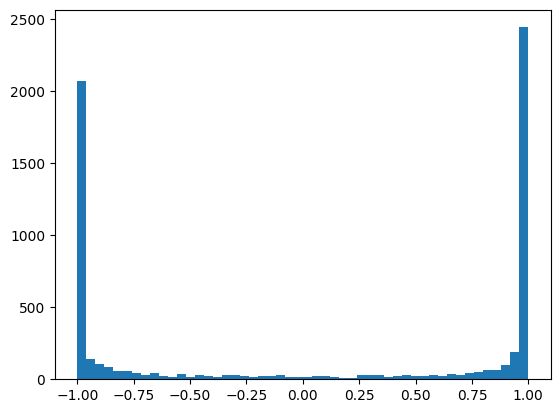

In [52]:
plt.hist(h.view(-1).tolist(), 50)

In [53]:
# tanh is most of the saturateed

(array([  2.,   2.,   1.,   4.,   2.,   4.,   6.,  15.,   5.,  25.,  32.,
         49.,  56.,  59.,  92., 119., 134., 197., 195., 221., 257., 275.,
        297., 341., 353., 375., 369., 349., 358., 362., 271., 312., 229.,
        206., 190., 167.,  87., 111.,  72.,  55.,  41.,  22.,  23.,  18.,
         17.,   8.,   5.,   7.,   2.,   1.]),
 array([-19.05793571, -18.31571732, -17.57349892, -16.83128052,
        -16.08906212, -15.34684372, -14.60462532, -13.86240692,
        -13.12018852, -12.37797012, -11.63575172, -10.89353333,
        -10.15131493,  -9.40909653,  -8.66687813,  -7.92465973,
         -7.18244133,  -6.44022293,  -5.69800453,  -4.95578613,
         -4.21356773,  -3.47134933,  -2.72913094,  -1.98691254,
         -1.24469414,  -0.50247574,   0.23974266,   0.98196106,
          1.72417946,   2.46639786,   3.20861626,   3.95083466,
          4.69305305,   5.43527145,   6.17748985,   6.91970825,
          7.66192665,   8.40414505,   9.14636345,   9.88858185,
         10.630800

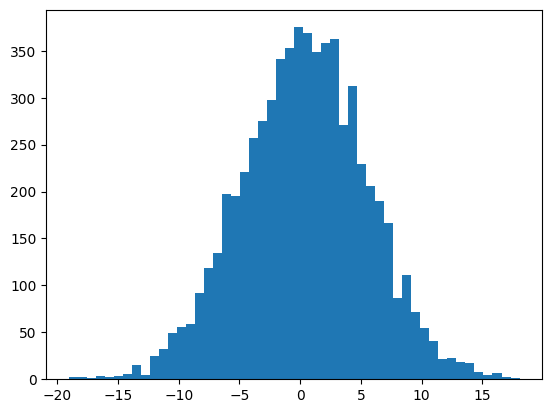

In [54]:
plt.hist(hpreact.view(-1).tolist(), 50)

In [55]:
# this is not cause
# when we are backpropogating thorugh tanh
# remeber grad = (1-t**2) * out.grad
# t close to 1 or -1 then grad will be 0
# whic will stop backprop
# makes sense since tanh is saturated range increasying input a bit wont affect output of tanh in anyway
# so no learning will occur

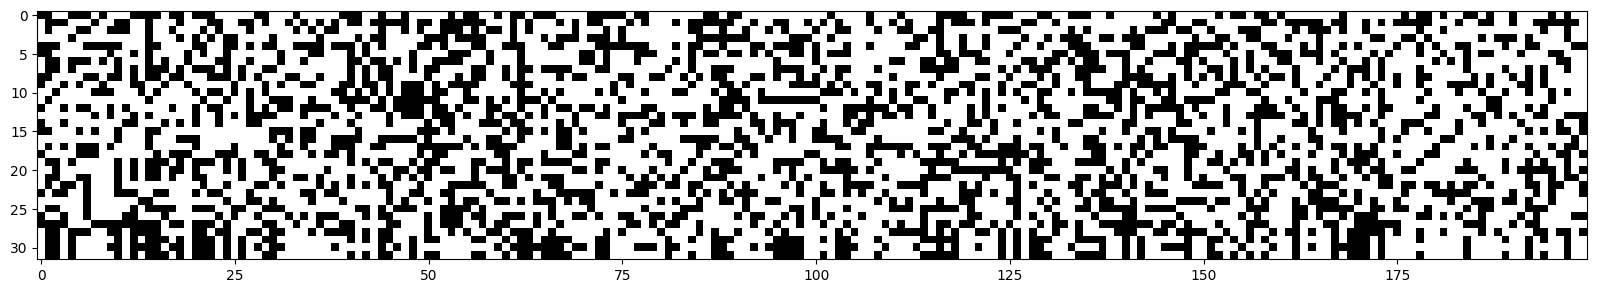

In [56]:
plt.figure(figsize=(20, 10))
plt.imshow(h.abs() > 0.99, cmap="gray", interpolation="nearest")

In [57]:
# relu has flat region below 0, so in that case if some neuron is below 0 it will never learn
# leaky relu wont suffer from this

In [58]:
# to solbe this problem we wanr hpreact to be close to 0 so it wont be in tanh saturation region
n_embed = 10 # dimension of the char embedding vector
n_hidden = 200 # neuron in hidden layer 

g = torch.Generator().manual_seed(2147483647)
# converts each letter to embedding 
C = torch.randn((vocab_size, n_embed), generator=g)
# first layer
W1 = torch.randn((n_embed * block_size, n_hidden), generator=g) * 0.1
b1 = torch.randn(n_hidden, generator=g) * 0.01
# second layer
W2 = torch.randn((n_hidden, vocab_size), generator=g) * 0.01 # scale down
b2 = torch.randn(vocab_size, generator=g) * 0 # removed bias

parameters = [C, W1, b1, W2, b2]
print(sum(p.nelement() for p in parameters))
for p in parameters:
    p.requires_grad = True

11897


In [59]:
max_steps = 200000 # epochs
batch_size = 32
lossi = []

for i in range(max_steps):
    # minibatch consturct
    # randonly sample some from training of given size
    ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
    Xb, Yb = Xtr[ix], Ytr[ix] # batch X, Y

    # forward pass
    emb = C[Xb] # embed char to vectors
    embcat = emb.view(emb.shape[0], -1) # concatenate 3 different vectors
    hpreact = embcat @ W1 + b1 # hidden layer
    h = torch.tanh(hpreact)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Yb)

    # backward pass
    # set grad to zero
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = 0.1 if i < 100000 else 0.01 # step learning rate decay
    for p in parameters:
        p.data += -lr * p.grad

    # torch stats
    if i % 10000 == 0:
        print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
    lossi.append(loss.log10().item())

    break

      0/ 200000: 3.3069


(array([  6.,  17.,  20.,  30.,  49.,  61.,  72.,  89.,  87.,  99., 135.,
        121., 153., 134., 138., 140., 174., 163., 179., 184., 138., 196.,
        183., 226., 165., 212., 191., 175., 201., 211., 189., 186., 166.,
        178., 183., 156., 194., 155., 171., 140., 139., 122., 102.,  96.,
         81.,  72.,  41.,  39.,  23.,  18.]),
 array([-0.95476669, -0.91695139, -0.87913609, -0.84132079, -0.80350549,
        -0.76569018, -0.72787488, -0.69005958, -0.65224428, -0.61442898,
        -0.57661368, -0.53879838, -0.50098307, -0.46316777, -0.42535247,
        -0.38753717, -0.34972187, -0.31190657, -0.27409127, -0.23627596,
        -0.19846066, -0.16064536, -0.12283006, -0.08501476, -0.04719946,
        -0.00938416,  0.02843115,  0.06624645,  0.10406175,  0.14187705,
         0.17969235,  0.21750765,  0.25532295,  0.29313826,  0.33095356,
         0.36876886,  0.40658416,  0.44439946,  0.48221476,  0.52003006,
         0.55784537,  0.59566067,  0.63347597,  0.67129127,  0.70910657,
 

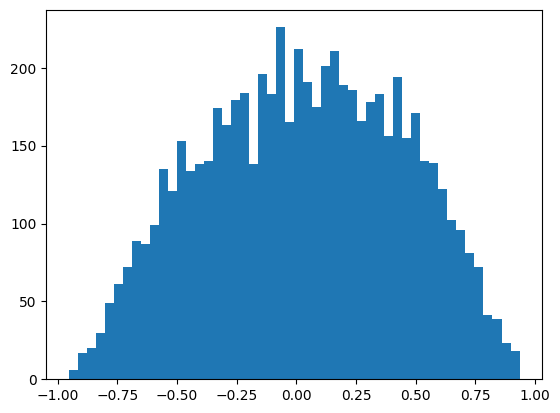

In [60]:
plt.hist(h.view(-1).tolist(), 50)

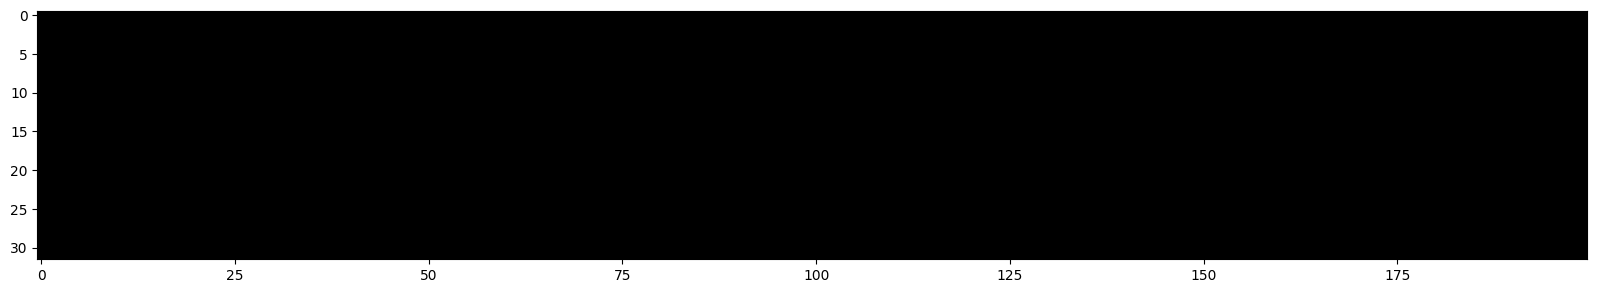

In [61]:
plt.figure(figsize=(20, 10))
plt.imshow(h.abs() > 0.99, cmap="gray", interpolation="nearest")

In [62]:
# init helps doing productive training
# by stop wasting time on decreasing weights initially and all

In [63]:
# how do we come up with these magic multiples
# how can be formalize this

tensor(-0.0017) tensor(0.9949)
tensor(0.0046) tensor(3.1430)


(array([1.24454257e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        6.22271284e-06, 0.00000000e+00, 1.24454257e-05, 2.48908514e-05,
        5.60044156e-05, 1.05786118e-04, 1.68013247e-04, 2.92467504e-04,
        4.79148889e-04, 8.15175383e-04, 1.53078736e-03, 2.79399807e-03,
        4.43057155e-03, 7.32413302e-03, 1.23458623e-02, 1.99873537e-02,
        2.99934759e-02, 4.35589899e-02, 6.26253821e-02, 8.41435231e-02,
        1.05854568e-01, 1.25468559e-01, 1.35474681e-01, 1.35655140e-01,
        1.22214080e-01, 1.01075525e-01, 7.89226670e-02, 5.79272339e-02,
        4.09081142e-02, 2.68385605e-02, 1.73115871e-02, 1.03110352e-02,
        6.55251663e-03, 4.10699048e-03, 2.32107189e-03, 1.28810156e-03,
        7.40502829e-04, 3.42249206e-04, 2.11572237e-04, 1.30676970e-04,
        8.08952670e-05, 4.35589899e-05, 2.48908514e-05, 6.22271284e-06,
        6.22271284e-06, 1.86681385e-05]),
 array([-21.59107971, -20.78757164, -19.98406357, -19.1805555 ,
        -18.37704742, -17.5735

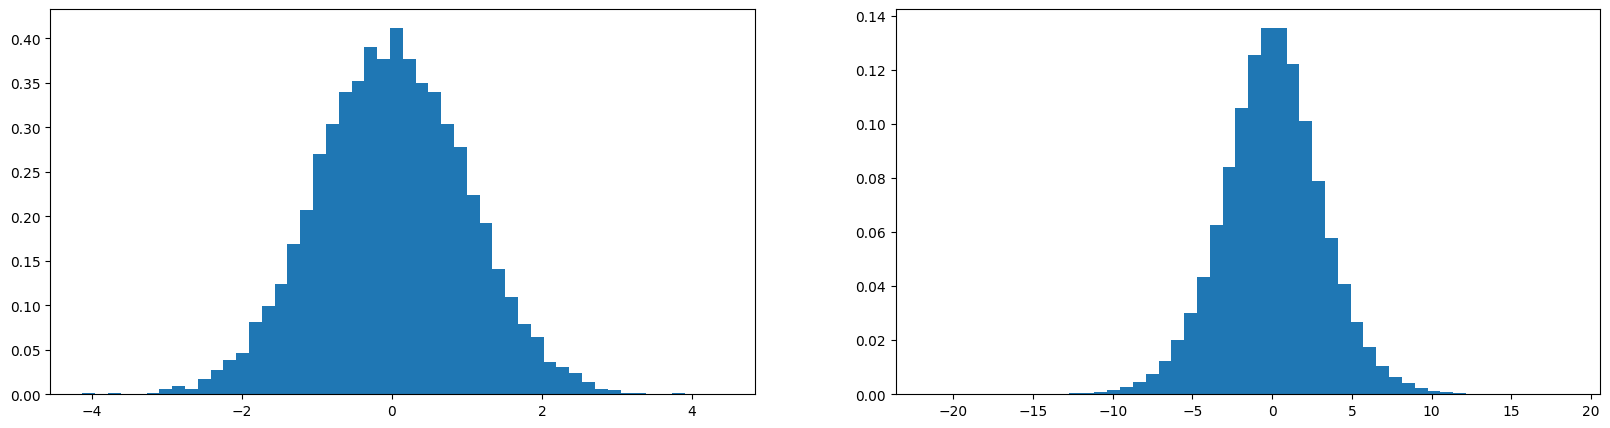

In [64]:
x = torch.randn(1000, 10)
w = torch.randn(10, 200)
y = x @ w
print(x.mean(), x.std())
print(y.mean(), y.std())
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.hist(x.view(-1).tolist(), 50, density=True)
plt.subplot(122)
plt.hist(y.view(-1).tolist(), 50, density=True)

In [65]:
# std deviation has expanded
# how to preserve std to be same gausian
# how to set weights to reduce this increase in std deviation
# solution: divide weights by sqrt of fanin that is input to that weight

tensor(-0.0028) tensor(0.9961)
tensor(-0.0002) tensor(0.9911)


(array([1.96331465e-05, 0.00000000e+00, 1.96331465e-05, 3.92662929e-05,
        7.85325859e-05, 1.96331465e-05, 5.88994394e-05, 4.12296076e-04,
        4.31929222e-04, 4.90828662e-04, 9.62024177e-04, 1.59028486e-03,
        3.39653434e-03, 5.65434618e-03, 8.69748389e-03, 1.55298189e-02,
        2.53463921e-02, 4.16026374e-02, 6.39255249e-02, 1.00030881e-01,
        1.45658314e-01, 2.11743485e-01, 2.79085177e-01, 3.54358661e-01,
        4.08997707e-01, 4.39468351e-01, 4.23310271e-01, 3.75974755e-01,
        3.06846446e-01, 2.31239199e-01, 1.67038810e-01, 1.15541067e-01,
        7.76687274e-02, 4.61771605e-02, 2.96853175e-02, 1.66292751e-02,
        1.18387873e-02, 6.65563665e-03, 4.41745796e-03, 2.80753994e-03,
        1.39395340e-03, 8.24592152e-04, 3.73029783e-04, 1.96331465e-04,
        1.57065172e-04, 1.37432025e-04, 3.92662929e-05, 3.92662929e-05,
        0.00000000e+00, 1.96331465e-05]),
 array([-6.53895283, -6.28428147, -6.02961012, -5.77493876, -5.52026741,
        -5.26559606, 

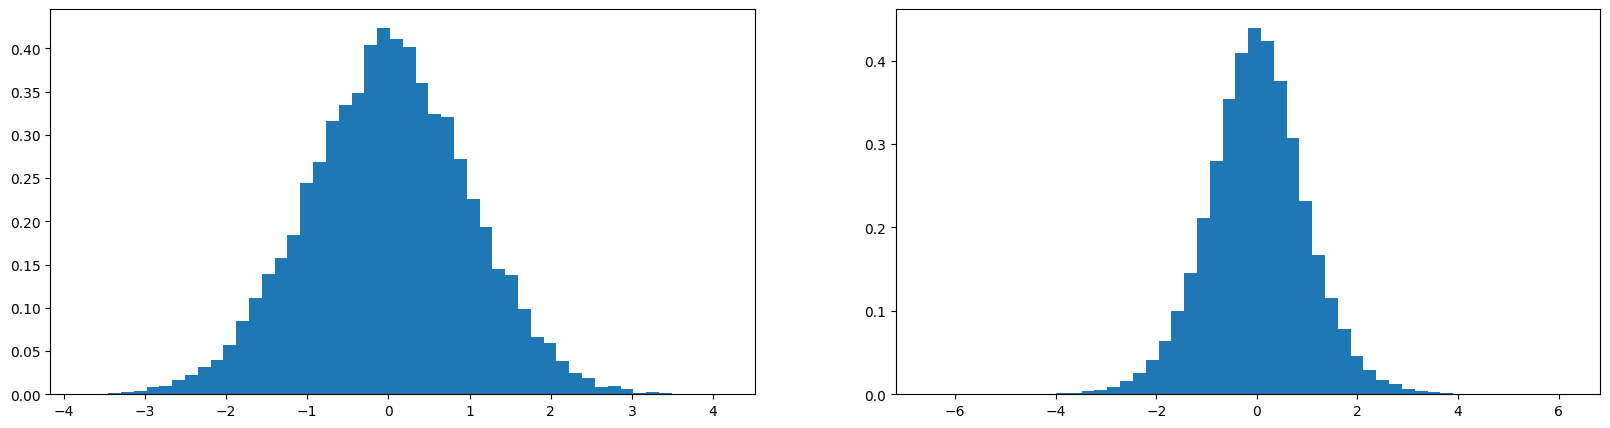

In [66]:
x = torch.randn(1000, 10)
w = torch.randn(10, 200) / (10**0.5)
y = x @ w
print(x.mean(), x.std())
print(y.mean(), y.std())
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.hist(x.view(-1).tolist(), 50, density=True)
plt.subplot(122)
plt.hist(y.view(-1).tolist(), 50, density=True)

In [67]:
# std deviation is same
# init way is already implemented in pytorch
# torch.nn.init.kaiming_normal() depends on activation/non linearity used

In [68]:
# modern changes limit need to initialize them correctly

In [69]:
torch.randn(10000).std() # std is 1, 0 mean

tensor(1.0073)

In [70]:
# to get std of 0.2
(torch.randn(10000)*0.2).std()

tensor(0.2008)

In [71]:
# set as per kaiming noraml initalize
n_embed = 10 # dimension of the char embedding vector
n_hidden = 200 # neuron in hidden layer 

g = torch.Generator().manual_seed(2147483647)
# converts each letter to embedding 
C = torch.randn((vocab_size, n_embed), generator=g)
# first layer
W1 = torch.randn((n_embed * block_size, n_hidden), generator=g) * ((5/3) / ((n_embed * block_size)**0.5))
b1 = torch.randn(n_hidden, generator=g) * 0.01
# second layer
W2 = torch.randn((n_hidden, vocab_size), generator=g) * 0.01 # scale down
b2 = torch.randn(vocab_size, generator=g) * 0 # removed bias

parameters = [C, W1, b1, W2, b2]
print(sum(p.nelement() for p in parameters))
for p in parameters:
    p.requires_grad = True

11897


In [72]:
max_steps = 200000 # epochs
batch_size = 32
lossi = []

for i in range(max_steps):
    # minibatch consturct
    # randonly sample some from training of given size
    ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
    Xb, Yb = Xtr[ix], Ytr[ix] # batch X, Y

    # forward pass
    emb = C[Xb] # embed char to vectors
    embcat = emb.view(emb.shape[0], -1) # concatenate 3 different vectors
    hpreact = embcat @ W1 + b1 # hidden layer
    h = torch.tanh(hpreact)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Yb)

    # backward pass
    # set grad to zero
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = 0.1 if i < 100000 else 0.01 # step learning rate decay
    for p in parameters:
        p.data += -lr * p.grad

    # torch stats
    if i % 10000 == 0:
        print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
    lossi.append(loss.log10().item())

      0/ 200000: 3.3179
  10000/ 200000: 2.1910
  20000/ 200000: 2.3270
  30000/ 200000: 2.5396
  40000/ 200000: 1.9468
  50000/ 200000: 2.3331
  60000/ 200000: 2.3852
  70000/ 200000: 2.1173
  80000/ 200000: 2.3159
  90000/ 200000: 2.2010
 100000/ 200000: 1.8591
 110000/ 200000: 2.0881
 120000/ 200000: 1.9389
 130000/ 200000: 2.3913
 140000/ 200000: 2.0949
 150000/ 200000: 2.1458
 160000/ 200000: 1.7824
 170000/ 200000: 1.7249
 180000/ 200000: 1.9751
 190000/ 200000: 1.8614


In [73]:
@torch.no_grad()
def split_loss(split):
    x,y = {
        "train": (Xtr, Ytr),
        "val": (Xdev, Ydev),
        "test": (Xte, Yte),
    }[split]
    emb = C[x]
    embcat = emb.view(emb.shape[0], -1)
    h = torch.tanh(embcat @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, y)
    print(split, loss.item())

split_loss("train")
split_loss("val")

train 2.0376641750335693
val 2.106989622116089


In [74]:
# batch normalization
# we want hpreact to be 0 mean and 1 std deviation if u remeber initally
# what if we did it all the time
# we will normalize it for each batch

In [75]:
# set as per kaiming noraml initalize
n_embed = 10 # dimension of the char embedding vector
n_hidden = 200 # neuron in hidden layer 

g = torch.Generator().manual_seed(2147483647)
# converts each letter to embedding 
C = torch.randn((vocab_size, n_embed), generator=g)
# first layer
W1 = torch.randn((n_embed * block_size, n_hidden), generator=g) * ((5/3) / ((n_embed * block_size)**0.5))
b1 = torch.randn(n_hidden, generator=g) * 0.01
# second layer
W2 = torch.randn((n_hidden, vocab_size), generator=g) * 0.01 # scale down
b2 = torch.randn(vocab_size, generator=g) * 0 # removed bias

parameters = [C, W1, b1, W2, b2]
print(sum(p.nelement() for p in parameters))
for p in parameters:
    p.requires_grad = True

11897


In [76]:
max_steps = 200000 # epochs
batch_size = 32
lossi = []

for i in range(max_steps):
    # minibatch consturct
    # randonly sample some from training of given size
    ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
    Xb, Yb = Xtr[ix], Ytr[ix] # batch X, Y

    # forward pass
    emb = C[Xb] # embed char to vectors
    embcat = emb.view(emb.shape[0], -1) # concatenate 3 different vectors
    hpreact = embcat @ W1 + b1 # hidden layer
    h = torch.tanh(hpreact)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Yb)

    # backward pass
    # set grad to zero
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = 0.1 if i < 100000 else 0.01 # step learning rate decay
    for p in parameters:
        p.data += -lr * p.grad

    # torch stats
    if i % 10000 == 0:
        print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
    lossi.append(loss.log10().item())
    break

      0/ 200000: 3.3179


In [77]:
hpreact.shape

torch.Size([32, 200])

In [78]:
hpreact.mean(0, keepdim=True) # keepdim true to easily broadcast it

tensor([[-6.4895e-01, -1.4597e-01, -8.0683e-01,  1.0174e+00,  4.8276e-01,
          3.9179e-01,  9.9218e-01, -7.3749e-01, -4.9225e-01,  6.8735e-01,
         -2.9563e-01, -1.1562e+00,  1.5454e-01, -3.3219e-03, -1.1526e-01,
          1.9449e-01,  1.1971e+00, -9.2370e-01, -6.0493e-02,  1.0650e+00,
          2.1513e-01, -4.7685e-01,  4.9706e-01,  6.6677e-01, -1.1607e-03,
          8.1026e-01,  6.2787e-01,  1.5279e-01, -1.0814e-01,  9.6126e-01,
         -1.6653e-01, -2.7353e-01,  4.4203e-02,  2.9378e-01, -2.4525e-01,
         -7.8650e-01, -2.0602e-01, -6.8203e-01, -2.2059e-01,  1.1570e-01,
         -1.7179e-03, -1.0641e+00, -6.0733e-01, -3.5109e-01,  1.6060e-01,
         -9.0421e-02,  3.4703e-01, -2.2447e-01,  5.0098e-01,  9.9949e-01,
         -3.7583e-02, -2.8671e-02,  9.9966e-01,  6.5420e-01,  3.8681e-01,
         -4.8521e-01, -6.3861e-02,  9.9010e-01,  2.2938e-01, -2.9470e-01,
         -9.5526e-02,  5.7888e-01,  1.9643e-01,  1.7939e-01,  3.9875e-01,
          5.0771e-01,  5.8065e-01,  4.

In [79]:
hpreact.std(0, keepdim=True) # keepdim true to easily broadcast it

tensor([[1.5754, 1.3254, 1.5610, 1.4098, 1.6534, 1.2083, 0.9523, 1.1277, 1.9093,
         1.3163, 1.2751, 1.1636, 1.1184, 1.2403, 0.9120, 1.2187, 1.9744, 1.2237,
         1.8974, 1.2805, 1.2232, 1.4200, 1.5374, 1.6672, 1.1480, 1.5804, 1.1898,
         1.2942, 1.8189, 1.6032, 1.3553, 1.3369, 1.6952, 1.5864, 1.5168, 1.5035,
         1.0359, 1.9976, 1.3965, 1.7787, 1.0727, 1.3621, 1.6309, 2.0599, 1.1662,
         1.2218, 1.5208, 1.5761, 0.8647, 1.2208, 0.9464, 0.9392, 1.2892, 0.9674,
         1.3067, 1.5019, 0.9808, 1.8787, 1.6687, 1.4628, 1.1963, 1.3688, 0.8030,
         1.2942, 1.4992, 1.3359, 1.3997, 1.0738, 1.6988, 1.8295, 1.1145, 1.5140,
         1.1073, 1.1720, 1.0499, 1.4159, 1.0021, 1.7107, 1.3186, 1.3349, 1.8360,
         1.5398, 1.6573, 1.8745, 1.4010, 1.3539, 1.1694, 1.0472, 1.1543, 1.1884,
         1.3937, 1.4828, 1.5281, 2.3096, 2.1635, 1.4064, 1.5561, 1.0843, 1.1285,
         1.2335, 1.2424, 1.2700, 1.9116, 1.1724, 1.4420, 1.5626, 1.4210, 1.2810,
         1.7997, 1.6398, 1.1

In [80]:
# noramlize 
max_steps = 200000 # epochs
batch_size = 32
lossi = []

for i in range(max_steps):
    # minibatch consturct
    # randonly sample some from training of given size
    ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
    Xb, Yb = Xtr[ix], Ytr[ix] # batch X, Y

    # forward pass
    emb = C[Xb] # embed char to vectors
    embcat = emb.view(emb.shape[0], -1) # concatenate 3 different vectors
    hpreact = embcat @ W1 + b1 # hidden layer
    # normalize hpreact
    hpreact = (hpreact-hpreact.mean(0, keepdim=True))/hpreact.std(0, keepdim=True) 
    h = torch.tanh(hpreact)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Yb)

    # backward pass
    # set grad to zero
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = 0.1 if i < 100000 else 0.01 # step learning rate decay
    for p in parameters:
        p.data += -lr * p.grad

    # torch stats
    if i % 10000 == 0:
        print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
    lossi.append(loss.log10().item())
    break

      0/ 200000: 3.2635


In [81]:
# but problem we dont want to force neural network to always return gaussian distruction with 0 mean and 1 std deviation
# we only want to do it at initlization only
# and give control to neural net learning to decide distrubion later
# to solve this
# take the normalized input, scale them with some gain and offset them with some bias
# and that is going to be learnable parameter
# hence neural network and can learn which distrubtion is better

In [82]:
# add batch normalization param
n_embed = 10 # dimension of the char embedding vector
n_hidden = 200 # neuron in hidden layer 

g = torch.Generator().manual_seed(2147483647)
# converts each letter to embedding 
C = torch.randn((vocab_size, n_embed), generator=g)
# first layer
W1 = torch.randn((n_embed * block_size, n_hidden), generator=g) * ((5/3) / ((n_embed * block_size)**0.5))
b1 = torch.randn(n_hidden, generator=g) * 0.01
# second layer
W2 = torch.randn((n_hidden, vocab_size), generator=g) * 0.01 # scale down
b2 = torch.randn(vocab_size, generator=g) * 0 # removed bias

# batch normalization param
# init at 1s to get 1 std intially and later NN can tune it to decide std
bngain = torch.ones((1, n_hidden))
# init at 0s to get 0 mean initally
bnbias = torch.zeros((1, n_hidden))

parameters = [C, W1, b1, W2, b2, bngain, bnbias]
print(sum(p.nelement() for p in parameters))
for p in parameters:
    p.requires_grad = True

12297


In [83]:
# noramlize 
max_steps = 200000 # epochs
batch_size = 32
lossi = []

for i in range(max_steps):
    # minibatch consturct
    # randonly sample some from training of given size
    ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
    Xb, Yb = Xtr[ix], Ytr[ix] # batch X, Y

    # forward pass
    emb = C[Xb] # embed char to vectors
    embcat = emb.view(emb.shape[0], -1) # concatenate 3 different vectors
    hpreact = embcat @ W1 + b1 # hidden layer
    # normalize hpreact
    hpreact = bngain * (hpreact-hpreact.mean(0, keepdim=True))/hpreact.std(0, keepdim=True) - bnbias
    h = torch.tanh(hpreact)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Yb)

    # backward pass
    # set grad to zero
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = 0.1 if i < 100000 else 0.01 # step learning rate decay
    for p in parameters:
        p.data += -lr * p.grad

    # torch stats
    if i % 10000 == 0:
        print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
    lossi.append(loss.log10().item())

      0/ 200000: 3.3147
  10000/ 200000: 2.1984
  20000/ 200000: 2.3375
  30000/ 200000: 2.4359
  40000/ 200000: 2.0119
  50000/ 200000: 2.2595
  60000/ 200000: 2.4775
  70000/ 200000: 2.1020
  80000/ 200000: 2.2788
  90000/ 200000: 2.1862
 100000/ 200000: 1.9474
 110000/ 200000: 2.3010
 120000/ 200000: 1.9837
 130000/ 200000: 2.4523
 140000/ 200000: 2.3839
 150000/ 200000: 2.1987
 160000/ 200000: 1.9733
 170000/ 200000: 1.8668
 180000/ 200000: 1.9973
 190000/ 200000: 1.8347


In [84]:
# update to use batch normalization
@torch.no_grad()
def split_loss(split):
    x,y = {
        "train": (Xtr, Ytr),
        "val": (Xdev, Ydev),
        "test": (Xte, Yte),
    }[split]
    emb = C[x]
    embcat = emb.view(emb.shape[0], -1)
    hpreact = embcat @ W1 + b1
    hpreact = bngain * (hpreact-hpreact.mean(0, keepdim=True))/hpreact.std(0, keepdim=True) - bnbias
    h = torch.tanh(hpreact)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, y)
    print(split, loss.item())

split_loss("train")
split_loss("val")

train 2.0668270587921143
val 2.104844808578491


In [85]:
# batch normalization
# coupling these examples mathematically
# whic can be problem
# logits is also a function of other examples that come in its batch
# which is weird
# it turns out to be good tho
# it kind of work as regualarizer
# its works as kind of augumenter
# which makes it hard for neural network to overfit these examples

In [86]:
# but people hate this property
# so people has avoided using batch normalization

In [87]:
# but after training how do we eval mean and std of single input
# solutoon
# calibrate batch norm at end of training

In [88]:
# calibrate batch norm at end of training
with torch.no_grad():
    # pass the training set complete
    emb = C[Xtr]
    embcat = emb.view(emb.shape[0], -1)
    hpreact = embcat @ W1 + b1
    # measure mean and std over the entire training set
    bnmean = hpreact.mean(0, keepdim = True)
    bnstd = hpreact.std(0, keepdim = True)

In [89]:
# fix std and mean for batch norm
@torch.no_grad()
def split_loss(split):
    x,y = {
        "train": (Xtr, Ytr),
        "val": (Xdev, Ydev),
        "test": (Xte, Yte),
    }[split]
    emb = C[x]
    embcat = emb.view(emb.shape[0], -1)
    hpreact = embcat @ W1 + b1
    hpreact = bngain * (hpreact-bnmean)/bnstd - bnbias
    h = torch.tanh(hpreact)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, y)
    print(split, loss.item())

split_loss("train")
split_loss("val")

train 2.0668270587921143
val 2.104926824569702


In [90]:
# but it requires extra step after training
# solution estimate mean and std during training for enture training set

In [91]:
# declare running mean and std
n_embed = 10 # dimension of the char embedding vector
n_hidden = 200 # neuron in hidden layer 

g = torch.Generator().manual_seed(2147483647)
# converts each letter to embedding 
C = torch.randn((vocab_size, n_embed), generator=g)
# first layer
W1 = torch.randn((n_embed * block_size, n_hidden), generator=g) * ((5/3) / ((n_embed * block_size)**0.5))
b1 = torch.randn(n_hidden, generator=g) * 0.01
# second layer
W2 = torch.randn((n_hidden, vocab_size), generator=g) * 0.01 # scale down
b2 = torch.randn(vocab_size, generator=g) * 0 # removed bias

bnmean_running = torch.zeros((1, n_hidden))
bnstd_running = torch.ones((1, n_hidden))

# batch normalization param
# init at 1s to get 1 std intially and later NN can tune it to decide std
bngain = torch.ones((1, n_hidden))
# init at 0s to get 0 mean initally
bnbias = torch.zeros((1, n_hidden))

parameters = [C, W1, b1, W2, b2, bngain, bnbias]
print(sum(p.nelement() for p in parameters))
for p in parameters:
    p.requires_grad = True

12297


In [92]:
max_steps = 200000 # epochs
batch_size = 32
lossi = []

for i in range(max_steps):
    # minibatch consturct
    # randonly sample some from training of given size
    ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
    Xb, Yb = Xtr[ix], Ytr[ix] # batch X, Y

    # forward pass
    emb = C[Xb] # embed char to vectors
    embcat = emb.view(emb.shape[0], -1) # concatenate 3 different vectors
    hpreact = embcat @ W1 + b1 # hidden layer
    # normalize hpreact
    bnmeani = hpreact.mean(0, keepdim=True)
    bnstdi = hpreact.std(0, keepdim=True)
    hpreact = bngain * (hpreact-bnmeani)/bnstdi - bnbias
    h = torch.tanh(hpreact)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Yb)

    with torch.no_grad():
        bnmean_running = 0.999 * bnmean_running + 0.001 * bnmeani
        bnstd_running = 0.999 * bnstd_running + 0.001 * bnstdi

    # backward pass
    # set grad to zero
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = 0.1 if i < 100000 else 0.01 # step learning rate decay
    for p in parameters:
        p.data += -lr * p.grad

    # torch stats
    if i % 10000 == 0:
        print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
    lossi.append(loss.log10().item())

      0/ 200000: 3.3147
  10000/ 200000: 2.1984
  20000/ 200000: 2.3375
  30000/ 200000: 2.4359
  40000/ 200000: 2.0119
  50000/ 200000: 2.2595
  60000/ 200000: 2.4775
  70000/ 200000: 2.1020
  80000/ 200000: 2.2788
  90000/ 200000: 2.1862
 100000/ 200000: 1.9474
 110000/ 200000: 2.3010
 120000/ 200000: 1.9837
 130000/ 200000: 2.4523
 140000/ 200000: 2.3839
 150000/ 200000: 2.1987
 160000/ 200000: 1.9733
 170000/ 200000: 1.8668
 180000/ 200000: 1.9973
 190000/ 200000: 1.8347


In [93]:
bnmean_running

tensor([[-2.3539,  0.6872, -0.9001,  1.0159,  1.0894,  1.0862,  1.7389, -2.1357,
          0.5608,  1.4246, -1.6445, -2.7426, -0.4861, -0.1510, -0.0687, -1.1550,
          0.6891, -2.6399, -0.1283,  1.6240, -0.7732, -0.2865,  0.0467,  0.6119,
          1.1172,  0.2433,  2.0542,  0.5778,  0.8515,  1.7729, -0.3741, -0.8385,
         -0.0831, -0.5198, -0.3816, -1.0698, -0.0781,  0.3370, -0.5768,  0.9935,
         -0.4507, -1.3313, -0.2895, -0.2299,  0.6877,  0.6936,  2.0835, -0.7759,
          2.3804,  1.8613,  0.8117,  0.2735,  1.8802,  0.4705,  0.6656, -1.8962,
         -0.0420,  0.4356,  1.3924, -0.8906, -0.4676,  1.1688,  0.5539,  0.6000,
          1.5853,  1.2103, -1.0171,  2.1421, -0.6330,  0.1070, -0.2926, -0.4831,
          0.9506, -1.0144, -2.9925,  0.6268,  1.4404, -0.1574,  0.0955,  0.5159,
          0.2487,  1.2401,  2.0104,  0.6695,  0.0768, -0.0851, -1.6767,  0.2963,
          2.2374, -0.0100, -0.6669,  1.4356, -0.8431, -1.2317, -1.0220,  0.2201,
          0.1928, -0.3261,  

In [94]:
bnmean

tensor([[-2.3355,  0.6775, -0.9133,  1.0163,  1.0865,  1.0938,  1.7437, -2.1208,
          0.5730,  1.4455, -1.6343, -2.7372, -0.4752, -0.1412, -0.0745, -1.1722,
          0.6851, -2.6219, -0.1065,  1.6325, -0.7706, -0.3063,  0.0479,  0.6115,
          1.1173,  0.2427,  2.0500,  0.5832,  0.8527,  1.7680, -0.3625, -0.8355,
         -0.0854, -0.5177, -0.3806, -1.0699, -0.0786,  0.3487, -0.5808,  0.9875,
         -0.4427, -1.3082, -0.2871, -0.2332,  0.6850,  0.6850,  2.0857, -0.7608,
          2.3866,  1.8734,  0.8259,  0.2803,  1.8898,  0.4709,  0.6739, -1.8940,
         -0.0401,  0.4338,  1.3760, -0.8910, -0.4523,  1.1754,  0.5613,  0.6051,
          1.5859,  1.2260, -1.0111,  2.1495, -0.6393,  0.0938, -0.2864, -0.4856,
          0.9632, -1.0461, -2.9990,  0.6391,  1.4327, -0.1590,  0.0941,  0.5253,
          0.2508,  1.2521,  2.0388,  0.6608,  0.0691, -0.0813, -1.6723,  0.2933,
          2.2423, -0.0210, -0.6666,  1.4253, -0.8412, -1.2248, -1.0129,  0.2230,
          0.2112, -0.3226,  

In [95]:
# now we can use bnmean_running instead of bnmean
# and same of std as well
# so now we have removed need of extra step after training for batch normalization

In [96]:
# loss curve should have single local minima and global minima
# so gradient descent wont pause on local minima

In [97]:
# since batch normalization normalizes mean of data to be 0
# any bias addiiton before batch norm will have no affect since that will be ultimlately removed to get 0 mean
n_embed = 10 # dimension of the char embedding vector
n_hidden = 200 # neuron in hidden layer 

g = torch.Generator().manual_seed(2147483647)
# converts each letter to embedding 
C = torch.randn((vocab_size, n_embed), generator=g)
# first layer
W1 = torch.randn((n_embed * block_size, n_hidden), generator=g) * ((5/3) / ((n_embed * block_size)**0.5))
# b1 = torch.randn(n_hidden, generator=g) * 0.01
# second layer
W2 = torch.randn((n_hidden, vocab_size), generator=g) * 0.01 # scale down
b2 = torch.randn(vocab_size, generator=g) * 0 # removed bias

bnmean_running = torch.zeros((1, n_hidden))
bnstd_running = torch.ones((1, n_hidden))

# batch normalization param
# init at 1s to get 1 std intially and later NN can tune it to decide std
bngain = torch.ones((1, n_hidden))
# init at 0s to get 0 mean initally
bnbias = torch.zeros((1, n_hidden))

parameters = [C, W1, W2, b2, bngain, bnbias]
print(sum(p.nelement() for p in parameters))
for p in parameters:
    p.requires_grad = True

12097


In [98]:
# removed bias before batch norm
max_steps = 200000 # epochs
batch_size = 32
lossi = []

for i in range(max_steps):
    # minibatch consturct
    # randonly sample some from training of given size
    ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
    Xb, Yb = Xtr[ix], Ytr[ix] # batch X, Y

    # forward pass
    emb = C[Xb] # embed char to vectors
    embcat = emb.view(emb.shape[0], -1) # concatenate 3 different vectors
    hpreact = embcat @ W1 # + b1 # hidden layer
    # normalize hpreact
    bnmeani = hpreact.mean(0, keepdim=True)
    bnstdi = hpreact.std(0, keepdim=True)
    hpreact = bngain * (hpreact-bnmeani)/bnstdi - bnbias
    h = torch.tanh(hpreact)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Yb)

    with torch.no_grad():
        bnmean_running = 0.999 * bnmean_running + 0.001 * bnmeani
        bnstd_running = 0.999 * bnstd_running + 0.001 * bnstdi

    # backward pass
    # set grad to zero
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = 0.1 if i < 100000 else 0.01 # step learning rate decay
    for p in parameters:
        p.data += -lr * p.grad

    # torch stats
    if i % 10000 == 0:
        print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
    lossi.append(loss.log10().item())

      0/ 200000: 3.3239
  10000/ 200000: 2.0322
  20000/ 200000: 2.5675
  30000/ 200000: 2.0125
  40000/ 200000: 2.2446
  50000/ 200000: 1.8897
  60000/ 200000: 2.0785
  70000/ 200000: 2.3681
  80000/ 200000: 2.2918
  90000/ 200000: 2.0238
 100000/ 200000: 2.3673
 110000/ 200000: 2.3132
 120000/ 200000: 1.6414
 130000/ 200000: 1.9311
 140000/ 200000: 2.2231
 150000/ 200000: 2.0027
 160000/ 200000: 2.0997
 170000/ 200000: 2.4949
 180000/ 200000: 2.0199
 190000/ 200000: 2.1707


In [99]:
# resnet 
# have residual connnection


In [100]:
# hockey stick loss
# too fast decrease in loss initally, means NN is not properly initalized

In [101]:
# use group or layer normalization instead of batch norm
# buggy cause couples other data

In [102]:
# plot gradient historgam also
# to see graident are not exploding and shriking
# all layer should have roughly same gradient

In [103]:
# watched till 1:27